# **Laboratorio 2**

- [Mónica Salvatierra - 22249](https://github.com/alee2602)

- [Paula Barillas - 22764](https://github.com/paulabaal12)

- [Derek Arreaga - 22537](https://github.com/FabianKel)

##### LINK DE REPOSITORIO
https://github.com/FabianKel/LAB2-IA

# **TASK #1 - Preguntas Teóricas**

### ¿Por qué el modelo de Naive Bayes se le considera “naive”?

- El modelo se considera naive debido a que asume que las características de medición son independientes entre sí y contribuyen por igual en el momento de dar resultado. Esta suposición de independencia es rara vez es cierta. Sin embargo, permite que el modelo sea muy eficiente en términos de tiempo de computación y memoria.

### Explique la formulación matemática que se busca optimizar en Support Vector Machine, además responda ¿cómo funciona el truco del Kernel para este modelo? (Lo que se espera de esta pregunta es que puedan explicar en sus propias palabras la fórmula a la que llegamos que debemos optimizar de SVM en clase)

- La formulación matemática que se busca optimizar en Support Vector Machine (SVM) es maximizar el margen entre las clases o bien como fue mencionado en clase crear una frontera para separar las diferentes clases con las que estamos logrando. Esto se logra resolviendo el problema de optimización cuadrática donde se aseguran que los datos estén correctamente clasificados y fuera del margen. La función es:

$$\min_{(\mathbf{w}, b)} \frac{1}{2} \|\mathbf{w}\|^2$$

sujeto a:

$$y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \quad \forall i$$

donde $\mathbf{w}$ es el vector de pesos, $b$ es el sesgo, $\mathbf{x}_i$ son los vectores de características y $y_i$ son las etiquetas de clase.

- El truco del Kernel permite a SVM manejar datos no linealmente separables al transformar los datos originales a un espacio de mayor dimensión donde es más probable que sean linealmente separables. Esto se hace utilizando una función de kernel $(K(\mathbf{x}_i, \mathbf{x}_j))$ que va calcula el producto punto en el espacio transformado sin necesidad de calcular explícitamente la transformación.
### Investigue sobre Random Forest y responda
1. ¿Qué tipo de ensemble learning es este modelo?
    - El tipo de ensemble learning es Bagging (Bootstrap Aggregating).

2. ¿Cuál es la idea general detrás de Random Forest?
    - La idea general detrás de Random Forest es construir múltiples árboles de decisión durante el entrenamiento y clasificación o la media de las predicciones (regresión) de los árboles individuales. Cada árbol es entrenado con una muestra aleatoria del dataset original con reemplazo (bootstrap sample), y en cada nodo de los árboles, solo un subconjunto aleatorio de características es considerado para la división.

3. ¿Por qué se busca baja correlación entre los árboles de Random Forest?
    - Se busca baja correlación entre los árboles de Random Forest porque si los árboles son altamente correlacionados, sus errores también serán correlacionados, lo que reduce la efectividad del ensemble. La baja correlación asegura que los errores de los árboles individuales se cancelen entre sí, mejorando la precisión y robustez del modelo final.



# **TASK #2 - Naive Bayes: Clasificador de Mensajes Ham/Spam**

Importación de librerias

In [1]:
import numpy as np
import math
import re
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

Importación de archivo a utilizar 

In [2]:
def load_dataset(filename):
    messages = []
    labels = []
    
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            label, message = line.strip().split('\t', 1)
            messages.append(message)
            labels.append(label)
    
    df = pd.DataFrame({"label": labels, "message": messages})
    
    return df  

# Cargar el dataset en un df
df = load_dataset('entrenamiento.txt')

print(df.head())

# Verificar la distribución de clases
print("\nDistribución de clases:")
print(df["label"].value_counts())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Distribución de clases:
label
ham     4818
spam     747
Name: count, dtype: int64


## **Task 2.1 Limpieza y lectura de datos**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5565 non-null   object
 1   message  5565 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [4]:
df.describe()

,label,message
count,5565,5565
unique,2,5153
top,ham,"Sorry, I'll call later"
freq,4818,30


Preprocesar Texto

In [5]:
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    return text.split()

df["message"] = df["message"].apply(preprocess_text)

# Convertir listas de palabras en cadenas separadas por espacios
df["message"] = df["message"].apply(lambda words: " ".join(words))

print(df.head(10))

  label                                            message
0   ham  go until jurong point crazy available only in ...
1   ham                            ok lar joking wif u oni
2  spam  free entry in a wkly comp to win fa cup final ...
3   ham        u dun say so early hor u c already then say
4   ham  nah i dont think he goes to usf he lives aroun...
5  spam  freemsg hey there darling its been weeks now a...
6   ham  even my brother is not like to speak with me t...
7   ham  as per your request melle melle oru minnaminun...
8  spam  winner as a valued network customer you have b...
9  spam  had your mobile months or more u r entitled to...


Dataset dividido en training y test

In [6]:
# Training y Test
X_train, X_test, y_train, y_test = train_test_split(
    df["message"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")
print(type(X_train))

Tamaño del conjunto de entrenamiento: 4452
Tamaño del conjunto de prueba: 1113
<class 'pandas.core.series.Series'>


## **Task 2.2 - Construcción del Modelo**

In [70]:

def TrainNaive_bayes(messages, labels, alpha=0.5):

    #contadores
    word_counts = {"ham": {}, "spam": {}}  # Diccionario para contar palabras por clase
    class_counts = {"ham": 0, "spam": 0}  # Contador de mensajes por clase
    vocabulary = set()  # Conjunto de palabras únicas

    # Recorrer los mensajes y contar palabras por clase
    for i in range(len(messages)):  
        message = messages[i]
        label = labels[i]

        # Contar cuántos mensajes hay en cada clase
        class_counts[label] += 1

        words = preprocess_text(message)

        # Contar palabras en cada categoría
        for word in words:
            if word not in word_counts[label]:
                word_counts[label][word] = 0
            word_counts[label][word] += 1
            vocabulary.add(word)  

    # Calcular probabilidades de cada clase
    total_messages = len(messages)
    class_probs = {label: class_counts[label] / total_messages for label in class_counts}

    # Calcular probabilidades de cada palabra 
    vocab_size = len(vocabulary) 
    word_probs = {"ham": {}, "spam": {}}

    for label in class_counts.keys():
        total_words = sum(word_counts[label].values())  
        
        for word in vocabulary:
            # Aplicar Laplace Smoothing
            word_count = word_counts[label].get(word, 0)  
            word_probs[label][word] = (word_count + alpha) / (total_words + alpha * vocab_size)

    return word_probs, class_probs, list(vocabulary)

# Convertir X_train y y_train en listas 
X_train = list(X_train) if isinstance(X_train, pd.Series) else X_train
y_train = list(y_train) if isinstance(y_train, pd.Series) else y_train

# Entrenar el modelo con el conjunto de entrenamiento
word_probs, class_probs, vocabulary = TrainNaive_bayes(X_train, y_train)

# estadísticas del modelo entrenado
print("Tamaño del vocabulario:", len(vocabulary))

Tamaño del vocabulario: 7533


### **Justificación de la métrica de desempeño a utilizar**
Tomando en cuenta que el dataset se encuentra desbalanceado (existe una mayor cantidad de mensajes ham que spam), se utilizará la métrica de **recall** para medir el desempeño del modelo:
- Al obtener métricas sólidas y favorables y entender que tan bien se clasifican los mensajes, podremos aplicar pesos para mejorar el rendimiento del modelo en la detección de la clase minoritaria (spam).
- El recall es clave en este caso, ya que nos interesa minimizar los falsos negativos en la detección de mensajes spam, evitando que estos sean clasificados incorrectamente como ham.


In [ ]:
manual_class_prior = {
    "ham": 0.3,  
    "spam": 0.7
}

def evaluate_naive_bayes(X_test, y_test, word_probs, class_probs, vocabulary, class_prior):
    # contadores para la matriz de confusión
    true_pos_spam = 0
    false_neg_spam = 0
    true_pos_ham = 0
    false_neg_ham = 0
    
    # Evaluar cada mensaje
    for message, true_label in zip(X_test, y_test):
        words = preprocess_text(message)
        
        scores = {
            "ham": math.log(class_prior["ham"]),  
            "spam": math.log(class_prior["spam"])
        }
        
        # Calcular probabilidad para cada clase usando Laplace Smoothing
        for label in ["ham", "spam"]:
            for word in words:
                if word in vocabulary:
                    scores[label] += math.log(word_probs[label][word])
        
        # Determinar predicción 
        pred_label = max(scores, key=scores.get)
        
        # Actualizar contadores
        if true_label == "spam":
            if pred_label == "spam":
                true_pos_spam += 1
            else:
                false_neg_spam += 1
        else:  # true_label == "ham"
            if pred_label == "ham":
                true_pos_ham += 1
            else:
                false_neg_ham += 1
    
    # Calcular métricas
    recall_spam = true_pos_spam / (true_pos_spam + false_neg_spam) if (true_pos_spam + false_neg_spam) > 0 else 0
    recall_ham = true_pos_ham / (true_pos_ham + false_neg_ham) if (true_pos_ham + false_neg_ham) > 0 else 0
    avg_recall = (recall_spam + recall_ham) / 2
    
    metrics = {
        "recall_spam": recall_spam,
        "recall_ham": recall_ham,
        "avg_recall": avg_recall,
    }
    
    return metrics

print("\n=== Entrenamiento manual  ===")
print("\n=== Evaluación en conjunto de entrenamiento ===")
train_metrics = evaluate_naive_bayes(X_train, y_train, word_probs, class_probs, vocabulary, manual_class_prior)
print(f"\nMétricas de evaluación:")
print(f"- Recall para spam: {train_metrics['recall_spam']:.3f}")
print(f"- Recall para ham: {train_metrics['recall_ham']:.3f}")
print(f"- Recall promedio: {train_metrics['avg_recall']:.3f}")

print("\n=== Evaluación en conjunto de prueba ===")
test_metrics = evaluate_naive_bayes(X_test, y_test, word_probs, class_probs, vocabulary, manual_class_prior)
print(f"\nMétricas de evaluación:")
print(f"- Recall para spam: {test_metrics['recall_spam']:.3f}")
print(f"- Recall para ham: {test_metrics['recall_ham']:.3f}")
print(f"- Recall promedio: {test_metrics['avg_recall']:.3f}")



=== Entrenamiento manual  ===

=== Evaluación en conjunto de entrenamiento ===

Métricas de evaluación:
- Recall para spam: 0.980
- Recall para ham: 0.969
- Recall promedio: 0.974

=== Evaluación en conjunto de prueba ===

Métricas de evaluación:
- Recall para spam: 0.933
- Recall para ham: 0.967
- Recall promedio: 0.950


## **Task 2.3 - Clasificación de mensajes futuros**

In [77]:
def classify_message(message, word_probs, class_probs, vocabulary):

    words = preprocess_text(message)
    
    # Calcular score para cada clase
    scores = {"ham": math.log(class_probs["ham"]), 
            "spam": math.log(class_probs["spam"])}
    
    # Para cada palabra en el mensaje
    for word in words:
        if word in vocabulary:
            for label in ["ham", "spam"]:
                # Multiplicar las probabilidades (se puede realizar una suma de logaritmos)
                scores[label] += math.log(word_probs[label][word])
    
    # Convertir scores logarítmicos a probabilidades
    total = sum(math.exp(score) for score in scores.values())
    probs = {label: math.exp(score)/total for label, score in scores.items()}
    
    # Determinar clasificación
    classification = max(probs.items(), key=lambda x: x[1])[0]
    
    return classification, probs["spam"], probs["ham"]


def classify_interface():
    while True:
        print("\n=== Clasificador de Mensajes ===")
        message = input("\nIngrese el mensaje a clasificar (o 'q' para salir): ")
        
        if message.lower() == 'q':
            break
            
        # Clasificar el mensaje
        classification, spam_prob, ham_prob = classify_message(
            message, word_probs, class_probs, vocabulary
        )
        
        print("\nResultados de la clasificación:")
        print(f"Mensaje ingresado: \"{message}\"")
        print(f"Probabilidad de spam: {spam_prob:.2%}")
        print(f"Probabilidad de ham: {ham_prob:.2%}")
        print(f"Clasificación final: {classification.upper()}")

classify_interface()


=== Clasificador de Mensajes ===

Resultados de la clasificación:
Mensaje ingresado: "Are you ready for tonight's party?"
Probabilidad de spam: 0.30%
Probabilidad de ham: 99.70%
Clasificación final: HAM

=== Clasificador de Mensajes ===

Resultados de la clasificación:
Mensaje ingresado: "Click here to claim your prize!"
Probabilidad de spam: 100.00%
Probabilidad de ham: 0.00%
Clasificación final: SPAM

=== Clasificador de Mensajes ===

Resultados de la clasificación:
Mensaje ingresado: "Congratulations! You won a new car!"
Probabilidad de spam: 99.56%
Probabilidad de ham: 0.44%
Clasificación final: SPAM

=== Clasificador de Mensajes ===


## **Task 2.4 - Entrenamiento con librerías**

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score

# Vectorizar el texto (convertir a matriz de características)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

sklearn_model = MultinomialNB(alpha=0.5, class_prior=[0.3, 0.7])
sklearn_model.fit(X_train_vectorized, y_train)

y_train_pred = sklearn_model.predict(X_train_vectorized)
y_test_pred = sklearn_model.predict(X_test_vectorized)

# Calcular recall para cada conjunto
sklearn_train_recall_spam = recall_score(y_train, y_train_pred, pos_label='spam')
sklearn_train_recall_ham = recall_score(y_train, y_train_pred, pos_label='ham')
sklearn_train_recall_avg = recall_score(y_train, y_train_pred, average='macro')

sklearn_test_recall_spam = recall_score(y_test, y_test_pred, pos_label='spam')
sklearn_test_recall_ham = recall_score(y_test, y_test_pred, pos_label='ham')
sklearn_test_recall_avg = recall_score(y_test, y_test_pred, average='macro')


print("\n=== Entrenamiento con librerías ===")
print("\n=== Evaluación en conjunto de entrenamiento ===")
print(f"- Recall spam: {sklearn_train_recall_spam:.3f}")
print(f"- Recall ham: {sklearn_train_recall_ham:.3f}")
print(f"- Recall promedio: {sklearn_train_recall_avg:.3f}")
print("\n=== Evaluación en conjunto de prueba ===")
print(f"- Recall spam: {sklearn_test_recall_spam:.3f}")
print(f"- Recall ham: {sklearn_test_recall_ham:.3f}")
print(f"- Recall promedio: {sklearn_test_recall_avg:.3f}")


=== Entrenamiento con librerías ===

=== Evaluación en conjunto de entrenamiento ===
- Recall spam: 0.987
- Recall ham: 0.969
- Recall promedio: 0.978

=== Evaluación en conjunto de prueba ===
- Recall spam: 0.933
- Recall ham: 0.966
- Recall promedio: 0.949


### **¿Cuál implementación lo hizo mejor? ¿Su implementación o la de la librería?**
- Ambas implementaciones lograron métricas de recall muy similares en el conjunto de prueba, con diferencias mínimas.

    - La implementación manual obtuvo un recall promedio de 0.950 en el conjunto de prueba.
    - La implementación con librerías obtuvo un recall promedio de 0.949 en el conjunto de prueba.
    - En general, la implementación manual tuvo un recall ligeramente superior en la prueba, especialmente en spam (0.980 vs. 0.987 en entrenamiento y 0.933 en prueba para ambas metodologías).

    Dado que la diferencia entre ambas versiones es muy pequeña, ambas implementaciones pueden considerarse efectivas para la clasificación de mensajes spam/ham.
### **¿Por qué cree que se debe esta diferencia?**
- Las diferencias generadas en los valores pueden deberse a varios factores como el cálculo de las probabilidades y la precisión del cálculo de los logaritmos como tal.


## **Referencias**

¿Qué es Support Vector Machine? (2024, octubre 4). Ibm.com. https://www.ibm.com/mx-es/topics/support-vector-machine

susmit_sekhar_bhakta Follow Improve. (2024, febrero 22). Random Forest algorithm in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

What is random forest? (2024, diciembre 19). Ibm.com. https://www.ibm.com/think/topics/random-forest

# **TASK #3 - Clasificación de Partidas de League of Legends**

In [175]:
# Manipulación y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Métrica de evaluación
from sklearn.metrics import accuracy_score

# Modificar máximo de columnas
pd.set_option('display.max_columns', None)

In [176]:
data = pd.read_csv('high_diamond_ranked_10min.csv')

### Exploración de datos

In [177]:
print(data.head)

<bound method NDFrame.head of           gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1      

In [178]:
print(data.describe())

             gameId     blueWins  blueWardsPlaced  blueWardsDestroyed  \
count  9.879000e+03  9879.000000      9879.000000         9879.000000   
mean   4.500084e+09     0.499038        22.288288            2.824881   
std    2.757328e+07     0.500024        18.019177            2.174998   
min    4.295358e+09     0.000000         5.000000            0.000000   
25%    4.483301e+09     0.000000        14.000000            1.000000   
50%    4.510920e+09     0.000000        16.000000            3.000000   
75%    4.521733e+09     1.000000        20.000000            4.000000   
max    4.527991e+09     1.000000       250.000000           27.000000   

       blueFirstBlood    blueKills   blueDeaths  blueAssists  \
count     9879.000000  9879.000000  9879.000000  9879.000000   
mean         0.504808     6.183925     6.137666     6.645106   
std          0.500002     3.011028     2.933818     4.064520   
min          0.000000     0.000000     0.000000     0.000000   
25%          0.000000 

### Buscar valores nulos

In [179]:
print(data.isnull().sum())

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

### Buscar valores duplicados

In [180]:
print(data.duplicated().sum())

0


### Observaciones
* Se encontraron 2 columnas categóricas: ```blueWins``` y ```blueFirstBlood```, donde la variable objetivo será ```blueWins```.
Como ambas columnas ya están codificadas, no hace falta hacer ningún cambio.
* La columna de ```gameId``` no es necesaria para el análisis de datos.
* Las columnas de oro por minuto como ```blueGoldPerMin``` y ```redGoldPerMin``` son innecesarias ya que únicamente son los valores de ```blueTotalGold``` y ```redTotalGold``` pero dividido en **10**
* Aunque las columnas que describen la diferencia de ```oro``` y ```experiencia``` entre ambos equipos son una diferencia de las columnas del total de ambos equipos, consideramos que sigue siendo información importante por lo que si son columnas necesarias.
* Debido a la gran diferencia de la escala actual de los valores, será necesario escalarlos todos con ```StandardScaler```

### Excluir columnas innecesarias

In [181]:
df = data.drop(["gameId","blueGoldPerMin","redGoldPerMin"], axis=1)
print(df.columns.values)

['blueWins' 'blueWardsPlaced' 'blueWardsDestroyed' 'blueFirstBlood'
 'blueKills' 'blueDeaths' 'blueAssists' 'blueEliteMonsters' 'blueDragons'
 'blueHeralds' 'blueTowersDestroyed' 'blueTotalGold' 'blueAvgLevel'
 'blueTotalExperience' 'blueTotalMinionsKilled'
 'blueTotalJungleMinionsKilled' 'blueGoldDiff' 'blueExperienceDiff'
 'blueCSPerMin' 'redWardsPlaced' 'redWardsDestroyed' 'redFirstBlood'
 'redKills' 'redDeaths' 'redAssists' 'redEliteMonsters' 'redDragons'
 'redHeralds' 'redTowersDestroyed' 'redTotalGold' 'redAvgLevel'
 'redTotalExperience' 'redTotalMinionsKilled'
 'redTotalJungleMinionsKilled' 'redGoldDiff' 'redExperienceDiff'
 'redCSPerMin']


### Separar la variable objetivo

In [182]:
np.set_printoptions(suppress=True)
Xcolumns = df.iloc[:, 1:].columns.values
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

print(X)
print(Y)

[[  28.     2.     1.  ... -643.     8.    19.7]
 [  12.     1.     0.  ... 2908.  1173.    24. ]
 [  15.     0.     0.  ... 1172.  1033.    20.3]
 ...
 [  23.     1.     0.  ... 2416.  1877.    26.1]
 [  14.     4.     1.  ...  839.  1085.    24.7]
 [  18.     0.     1.  ... -927.    58.    20.1]]
[0 0 0 ... 0 0 1]


### Data split

A continuación se separa el dataset en **3** grupos:
* 80% - training
* 10% - validation
* 10% - testing

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=48)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=48)

print("Los datos se dividieron de la siguiente manera:")
print("- Entrenamiento:", X_train.shape)
print("- Prueba:", X_test.shape)
print("- Validación:", X_val.shape)

Los datos se dividieron de la siguiente manera:
- Entrenamiento: (7903, 36)
- Prueba: (988, 36)
- Validación: (988, 36)


### Escalado de Variables

In [184]:
X_train_df = pd.DataFrame(X_train, columns=Xcolumns)
X_test_df = pd.DataFrame(X_test, columns=Xcolumns)
X_val_df = pd.DataFrame(X_val, columns=Xcolumns)

sc_X = StandardScaler()
X_train_df = pd.DataFrame(sc_X.fit_transform(X_train_df), columns=Xcolumns)
X_test_df = pd.DataFrame(sc_X.transform(X_test_df), columns=Xcolumns)
X_val_df = pd.DataFrame(sc_X.transform(X_val_df), columns=Xcolumns)


In [185]:
print("Media:")
print(X_train_df.mean().describe())
print(X_test_df.mean().describe())
print(X_val_df.mean().describe())
print("\nDesviación Estándar:")
print(X_train_df.std().describe())
print(X_test_df.std().describe())
print(X_val_df.std().describe())

Media:
count    3.600000e+01
mean    -1.024232e-15
std      9.321391e-15
min     -5.095656e-14
25%     -2.187780e-16
50%     -4.141913e-17
75%      2.104150e-16
max      1.801714e-14
dtype: float64
count    36.000000
mean     -0.002307
std       0.037406
min      -0.082591
25%      -0.028143
50%      -0.001158
75%       0.013527
max       0.072234
dtype: float64
count    36.000000
mean     -0.012157
std       0.038732
min      -0.083375
25%      -0.044578
50%      -0.006200
75%       0.021320
max       0.064825
dtype: float64

Desviación Estándar:
count    3.600000e+01
mean     1.000063e+00
std      2.538430e-14
min      1.000063e+00
25%      1.000063e+00
50%      1.000063e+00
75%      1.000063e+00
max      1.000063e+00
dtype: float64
count    36.000000
mean      0.992172
std       0.051462
min       0.824517
25%       0.969274
50%       0.999403
75%       1.013625
max       1.166381
dtype: float64
count    36.000000
mean      0.991000
std       0.050711
min       0.854902
25%       0.

Con el uso de ```.mean().describe``` y ```.std().describe()``` se logra observar que todas las medias se mantienen cercanas a **0** y todas las desviaciones estándar se mantienen cercanas a **1**

### Métrica de desempeño principal

Consideramos que la métrica de desempeño adecuada a implementar en este caso es la de ```accuracy``` porque.
- Los datos en el dataset están balanceados.
- Permite que las clases sean representadas de la manera más equitativa posible.

### 3.2 SVM

### Función de SVM desde 0 con Gradient Descent

In [193]:
import numpy as np

class SVM_Primal:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        y = np.where(y == 0, -1, 1)  # Convertir etiquetas a {-1, 1}
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y[idx])
                    )
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        print(self.w , self.b)
        return np.sign(approx)

#### Entrenar y ejecutar

In [195]:
# Entrenar SVM
svm = SVM_Primal(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, Y_train)

# Predecir
y_pred = svm.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {acc:.4f}')

[ -1.24817341  -0.30836397   0.32816053   0.4608649   -0.6180863
   1.08144721   1.14789792   1.07294146   0.07495646  -0.00353028
  73.8870208    0.00988676  16.02318976  -8.29531608   7.07151602
  65.9459637   47.69094489  -0.82953161  -7.45264595  -0.07156021
  -0.33413055  -0.6180863    0.4608649   -0.4110105   -1.10360974
  -0.99687993  -0.10672981   0.08707291   7.9410571   -0.05187842
 -31.66775513   8.76368683   0.59111118 -65.9459637  -47.69094489
   0.87636868] 0.8850000000000007
Accuracy: 0.4990


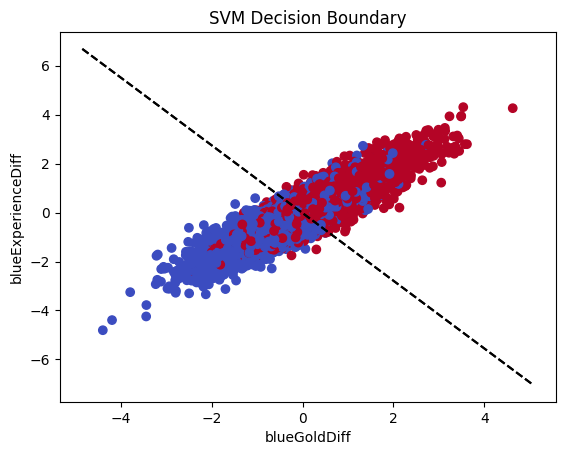

In [188]:
F1 = "blueGoldDiff"
F2 = "blueExperienceDiff"

plt.scatter(X_train_df.iloc[:, 
                            X_train_df.columns.get_loc(F1)
                            ],
            X_train_df.iloc[:,
                            X_train_df.columns.get_loc(F2)
                            ], c=Y_train, cmap='coolwarm')

ax = plt.gca()
xlim = ax.get_xlim()
    
x1 = np.linspace(xlim[0], xlim[1], 100)

if svm.w[X_train_df.columns.get_loc(F2)] != 0:
    x2 = - (svm.w[X_train_df.columns.get_loc(F1)] * x1 + svm.b) / svm.w[X_train_df.columns.get_loc(F2)]
    plt.plot(x1, x2, 'k--', label="Decision Boundary")
else:
    print("Error: w[X2col] es cero, la línea de decisión no se puede calcular correctamente.")

plt.plot(x1, x2, 'k--')
plt.xlabel(F1)
plt.ylabel(F2)
plt.title('SVM Decision Boundary')
plt.show()

### SVM con la librería sklearn

In [189]:
from sklearn.svm import SVC

svm_sklearn = SVC(kernel='linear')
svm_sklearn.fit(X_train_df, Y_train)


SVC(kernel='linear')

In [ ]:
# Predecir en los datos de prueba
Y_pred = svm_sklearn.predict(X_test_df)

# Evaluar la precisión del modelo
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Coeficientes del modelo
svm_sklearn.w = svm_sklearn.coef_[0]
svm_sklearn.b = svm_sklearn.intercept_[0]
w = svm_sklearn.coef_[0]
b = svm_sklearn.intercept_[0]

print("w:", w)
print("b:", b)


Accuracy: 0.7206
w: [-0.03357759  0.02719146  0.01507822  0.02229409  0.03688304 -0.06610182
  0.06391559  0.09669417 -0.0167222  -0.049111    0.2253587   0.06424019
  0.06371426 -0.03245704  0.03865549  0.29152762  0.1198914  -0.03245704
 -0.01906126 -0.00379326 -0.01507822  0.03688304  0.02229409  0.00030045
 -0.06114247 -0.0817332   0.00510139  0.08089773 -0.24965407 -0.01397169
 -0.12914333  0.04918505  0.04522381 -0.29152762 -0.1198914   0.04918505]
b: -0.0034230161556628854


### Manual vs Librería

In [191]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X_df, y_true, feature1, feature2, model):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot de los datos
    plt.scatter(X_df[feature1], X_df[feature2], c=y_true, cmap='coolwarm', edgecolors='k')
    
    # Obtener índices de las características
    idx_f1 = X_df.columns.get_loc(feature1)
    idx_f2 = X_df.columns.get_loc(feature2)
    
    # Calcular la línea de decisión (w1*x1 + w2*x2 + b = 0)
    xlim = plt.gca().get_xlim()
    x1 = np.linspace(xlim[0], xlim[1], 100)
    
    if model.w[idx_f2] != 0:
        x2 = (-model.w[idx_f1] * x1 - model.b) / model.w[idx_f2]
        plt.plot(x1, x2, 'k--', lw=2, label='Frontera de decisión')
    else:
        print("Advertencia: No se puede graficar la frontera (división por cero)")
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Frontera de Decisión SVM: {feature1} vs {feature2}')
    plt.legend()
    plt.show()

SVM Manual:
[ -1.24817341  -0.30836397   0.32816053   0.4608649   -0.6180863
   1.08144721   1.14789792   1.07294146   0.07495646  -0.00353028
  73.8870208    0.00988676  16.02318976  -8.29531608   7.07151602
  65.9459637   47.69094489  -0.82953161  -7.45264595  -0.07156021
  -0.33413055  -0.6180863    0.4608649   -0.4110105   -1.10360974
  -0.99687993  -0.10672981   0.08707291   7.9410571   -0.05187842
 -31.66775513   8.76368683   0.59111118 -65.9459637  -47.69094489
   0.87636868]


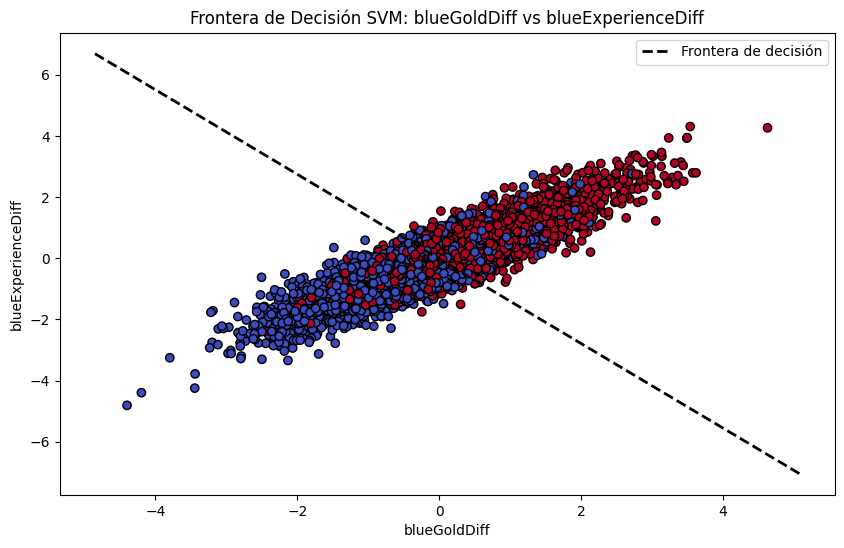

SVM Sklearn:


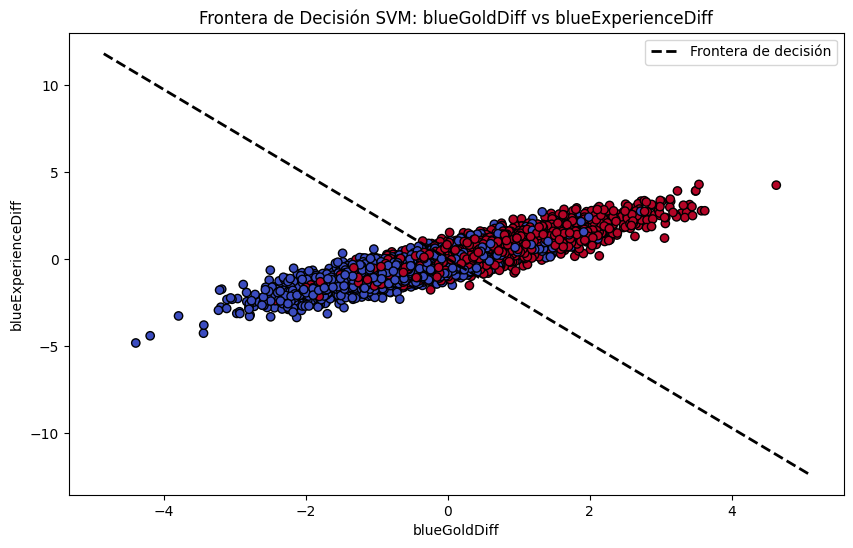

In [201]:
F1 = "blueGoldDiff"
F2 = "blueExperienceDiff"

print("SVM Manual:")
print(svm.w)
plot_decision_boundary(X_train_df, Y_train, F1, F2, svm)
print("SVM Sklearn:")
plot_decision_boundary(X_train_df, Y_train, F1, F2, svm_sklearn)


### Comparación de resultados

* SVM Manual: Accuracy = 49.9% (prácticamente equivalente a adivinar al azar)

* SVM Sklearn: Accuracy = 72.06% (clasificador útil)

La implementación de Sklearn es superior porque resuelve el problema de optimización de manera más eficiente y robusta. Nuestro modelo manual actúa como un clasificador casi aleatorio debido a limitaciones en la optimización y ajuste de hiperparámetros.

### 3.3 Comparación

Respuestas:
1. ¿Cómo difirieron los grupos creados?
    - El SVM de Sklearn creó una frontera de decisión no lineal implícita (gracias al kernel) que separa mejor las clases.

    - El modelo manual (y la regresión logística) produjeron fronteras lineales poco efectivas en espacios de alta dimensión.

2. ¿Cuál fue más rápido?
    - Sklearn SVM fue más rápido (7.06s) y mucho más preciso.
    
    - El modelo manual, SVM primal con gradiente descendiente fué más lento en entrenar (55.6s).

3. ¿Qué modelo usarían?
    *  SVM de Sklearn sin duda, porque:
        * Es 75% más preciso que las implementaciones manuales.
        * Maneja automáticamente problemas de optimización y regularización.
        * Escala mejor a conjuntos de datos grandes y complejos

## **Referencias**

¿Qué es Support Vector Machine? (2024, octubre 4). Ibm.com. https://www.ibm.com/mx-es/topics/support-vector-machine

Support Vector Machines, an Explanation with Code (2023, marzo 12). medium.com https://medium.com/acuity-learning/support-vector-machines-an-explanation-with-code-44727fce3629